In [2]:
# ch4-2.py
import pandas as pd
import numpy as np

# Scikit-Learn 패키지 : 머신 러닝 교육 및 실무를 위한 패키지로 샘플 데이터셋,
# 다양한 기계학습 기법에 대한 함수 등을 포함하고 있음
from sklearn import tree  # 의사결정트리 기법에 관련된 모듈
from sklearn.model_selection import train_test_split  # 분석모형 선택에 관련된 모듈
from sklearn.preprocessing import StandardScaler  # 데이터전처리에 관련된 모듈

### 본 예제의 목적은 품종 분류(classification)나 예측(prediction)이 아니라 품종에 영향을 미치는 속성의 부분집합 선택
### 의사결정트리 :  분류 기법으로 기계학습의 일종
### Scikit-Learn 패키지 : 기계학습 교육 및 실무를 위한 도구(함수) 제공
### 본 예제에서는 이 패키지에서 제공한 의사결정트리 기법 관련 함수를 이용

In [3]:
# 데이터로드 (ch4-2(붓꽃데이터).csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('.jupyter/ch4-2(붓꽃데이터).csv', encoding='CP949', engine='python')

### sklearn 패키지는 기계학습에 사용되는 전형적인 데이터셋을 제공함. iris 데이터도 그 일종임.
### iris 원시데이터는 datasets.load_iris()를 이용하여 읽어들일 수 있는데, 여기서는 예제데이터(csv)로 제공되는 파일로부터 읽는 코드를 사용함

In [4]:
rawData

,no,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
# 소스 데이터프레임에서 분류(classification)을 위한 속성 집합
X = rawData.loc[:, 'sepal_length' : 'petal_width']  
y = rawData.loc[:, 'class']  # 분류 클래스(class)

# 자동으로 데이터셋을 트레이닝셋과 테스트셋으로 분리해주는 함수로
# 트레이닝셋과 데이터셋의 비율을 7:3으로 세팅함
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###  의사결정트리 분석을 위해 트레이닝셋과 테스트셋의 비율을 7:3으로 정함
#### 트레이닝셋 : 학습시킬 대상 셋
#### 테스트셋 : 의사결정트리의 정확도(accuracy)를 검증

In [6]:
# DecisionTreeClassifier() : 의사결정트리를 생성하는 함수
# fit() : 트레이닝 데이터셋을 대상으로 의사결정트리 학습 진행
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score  # 분류 정확도(classification accuracy)를 계산하는 모듈

# tree.predict() 함수를 활용하여 의사결정트리를 대상으로 테스트셋을 예측
y_pred_tr = iris_tree.predict(X_test)

In [7]:
# accuracy_score() 함수를 활용하여 테스트셋의 실제 클래스와 예측된 클래스 간 정확도 측정
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


### DecisionTreeClassifier(), fit() 함수 : 의사결정트리 생성 및 학습 진행
### tree_predict(), accuracy_score() 함수 : 의사결정트리의 정확도 검증

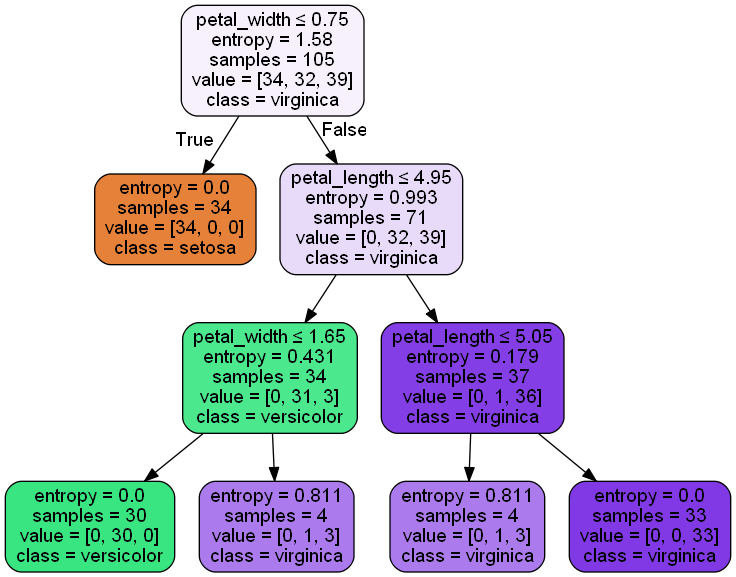

In [9]:
# 의사결정트리 시각화를 위한 작업
# 트리 시각화를 위한 export_graphviz 모듈 임포트 (이를 위해 graphviz 별도 설치 필요)
from sklearn.tree import export_graphviz
import pydotplus  # graphviz의 dot language 와의 인터페이스를 제공하는 패키지 임포트
from IPython.display import Image  # IPython의 display와 관련된 Public API

x_list = list(X.columns)
y_list = list(y.drop_duplicates(inplace=False))

# export_graphviz() : 의사결정트리에 대한 graphviz dot data를 생성하는 함수
dot_data = export_graphviz(iris_tree, out_file=None, feature_names=x_list,
                          class_names=y_list, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  # graphviz의 dot data로부터 트리 그래프 생성

# 트리 그래프를 위한 png 이미지 생성 및 출력 (jupyter notebook 환경에서 구동함)
Image(graph.create_png())

### 의사결정트리 시각화를 위해서 sklearn.tree의 export_graphviz 모듈을 이용
#### export_graphviz() : 의사결정트리에 대한 graphviz(DOT 스크립트 언어로 명세되는 그래프 시각화 오픈 소스) dot data를 생성하는 함수
#### pydotplus.graph_from_dot_data() : dot data를 이용하여 그래프를 생성하는 함수
#### Image(), create_png() 함수 : 그래프에 대한 png 이미지를 생성하여 출력하는 함수 

### 정확도(accuracy) : 0.98의 의미는 테스트셋을 대상으로 의사결정트리를 통해 분류된 품종과 실제 품종 비교 결과, 98%가 일치한다는 의미
### 위 의사결정트리 해석 예시
#### 꽃잎너비(petal_width)가 0.75이하이면 setosa 품종으로 판단되고, 그렇지 않으면 꽃잎길이(petal_length)를 기준으로 4.95이하이고 꽃잎너비가 1.65이하이면 versicolor 품중이, 꽃잎길이가 4.95보다 길면 virginia 품종으로 판단됨
### 결과적으로, 4개의 속성 중 꽃잎너비와 꽃잎길이만 위 트리 상에 나타나 품종에 영향을 미치는 속성이라고 판단됨
### 그러므로, 품종에 영향을 미치는 속성의 부분집합은 {꽃잎길이, 꽃잎너비} 이상 2개의 속성으로 볼 수 있음